# Read NetCDF File
This jupyter notebook demonstrates how to read and plot data from NetCDF files.

First, import some libraries (this requires the `netCDF4` library to be installed).

In [2]:
import os
import numpy as np
import pandas as pd
import netCDF4 as netcdf
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Next, read the NetCDF file.

**NOTE:** the input NetCDF file `data\fl.et.2019.v.0.1.nc` is not provided in this repository. Please download the file separately and place in the `data\` directory or update the code block below to reflect the location of the file on your system.

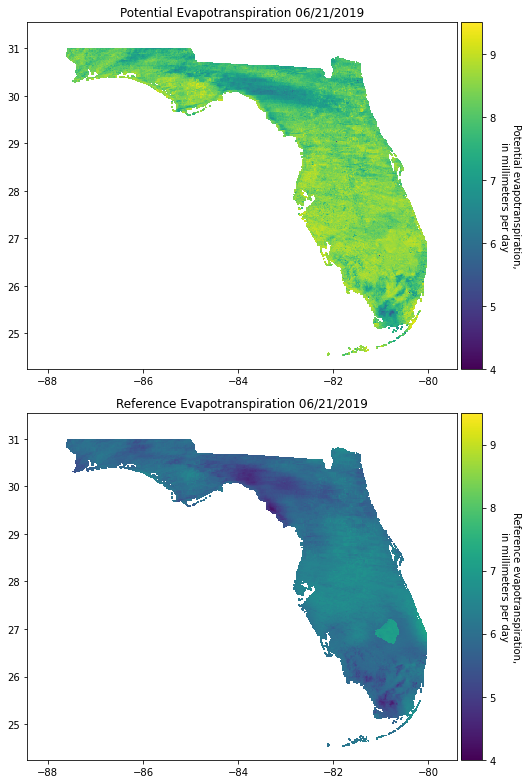

In [4]:
idx = 171

fname = r'data\fl.et.2019.v.1.0.nc'
with netcdf.Dataset(fname, 'r') as nc:
    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    pet = nc.variables['PET'][idx]
    eto = nc.variables['ETo'][idx]

xx, yy = np.meshgrid(lon, lat)
    
fig = plt.figure(figsize=(8.5, 11))

dates = pd.date_range('1/1/2019', '12/31/2019', freq='D')
dtstr = dates[idx].strftime('%m/%d/%Y')

ax = fig.add_subplot(211, aspect='equal')
ax.set_title(f'Potential Evapotranspiration {dtstr}')
cm = ax.pcolormesh(xx, yy, pet, vmin=4, vmax=9.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=.05)
cb = plt.colorbar(cm, cax=cax)
cb.ax.set_ylabel('Potential evapotranspiration,\nin millimeters per day', rotation=-90, va="bottom")


ax = fig.add_subplot(212, aspect='equal')
ax.set_title(f'Reference Evapotranspiration {dtstr}')
cm = ax.pcolormesh(xx, yy, eto, vmin=4, vmax=9.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=.05)
cb = plt.colorbar(cm, cax=cax)
cb.ax.set_ylabel('Reference evapotranspiration,\nin millimeters per day', rotation=-90, va="bottom")


plt.tight_layout()

plt.show()